In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings

matplotlib.rcParams['font.family'] = 'Binggrae'
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 13
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv', index_col = 'id')
dft = pd.read_csv('test.csv', index_col = 'id')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.8+ KB
None


## EDA _ preprocessing

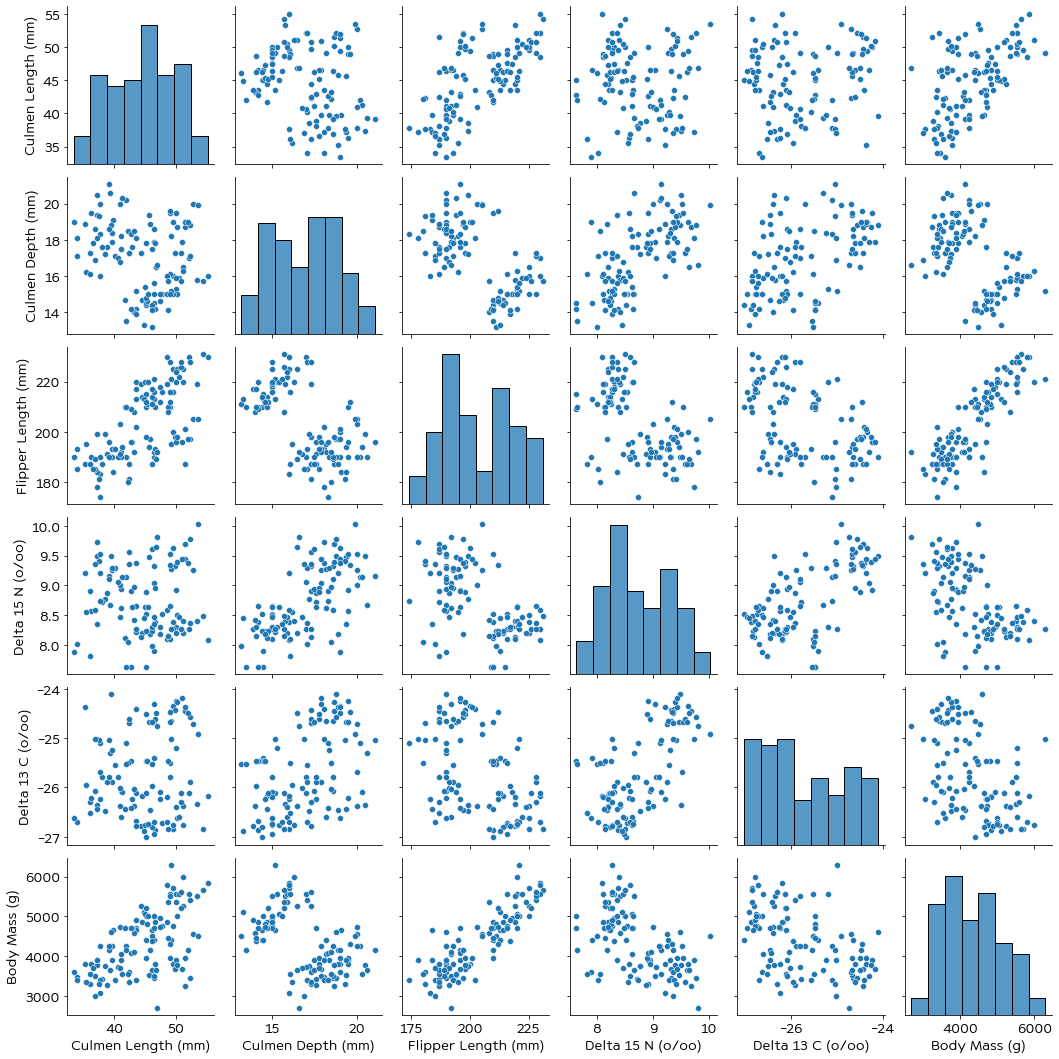

In [4]:
sns.pairplot(df, diag_kind='hist') 

plt.show()

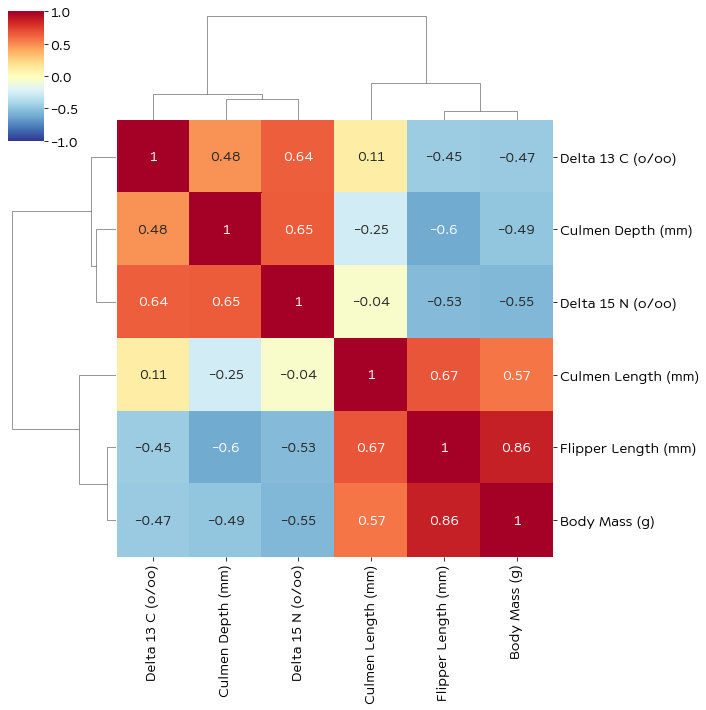

In [5]:
dfc = df.corr()

sns.clustermap(dfc, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

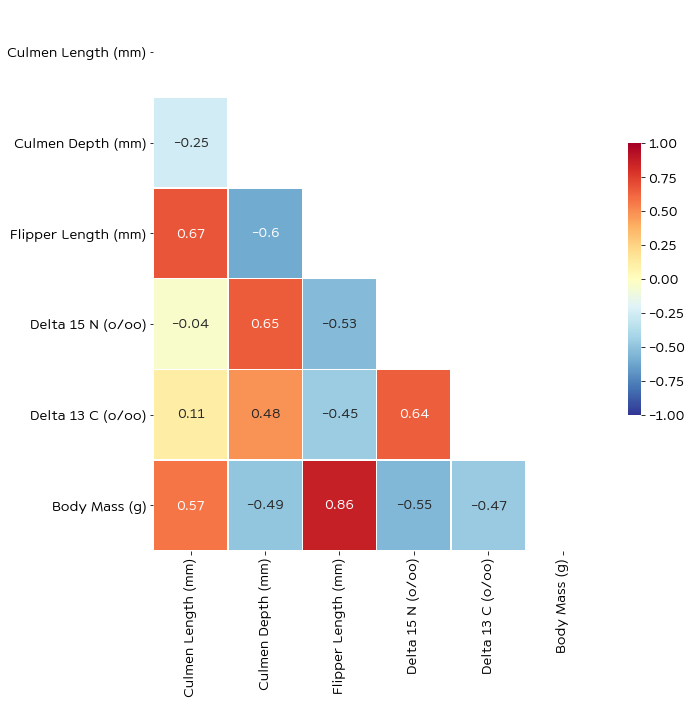

In [6]:
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(dfc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(dfc, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

<AxesSubplot:>

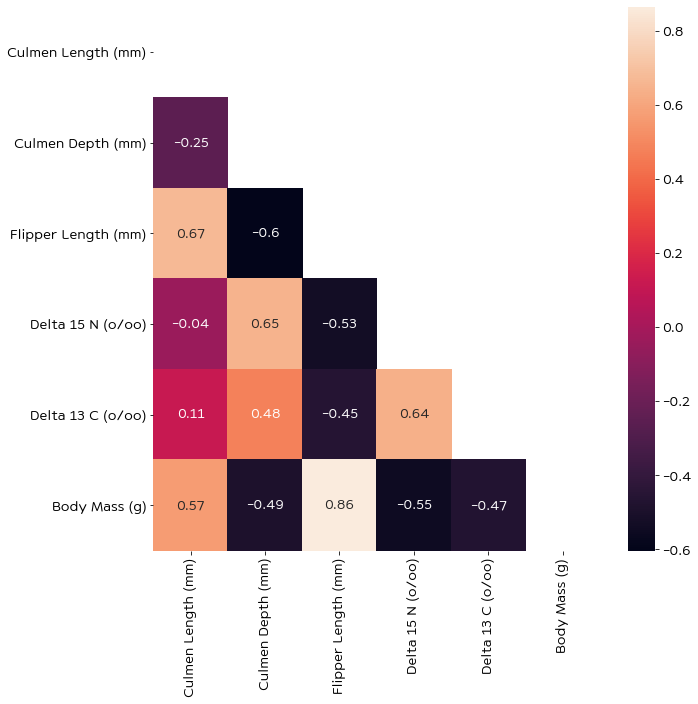

In [7]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, mask=mask)

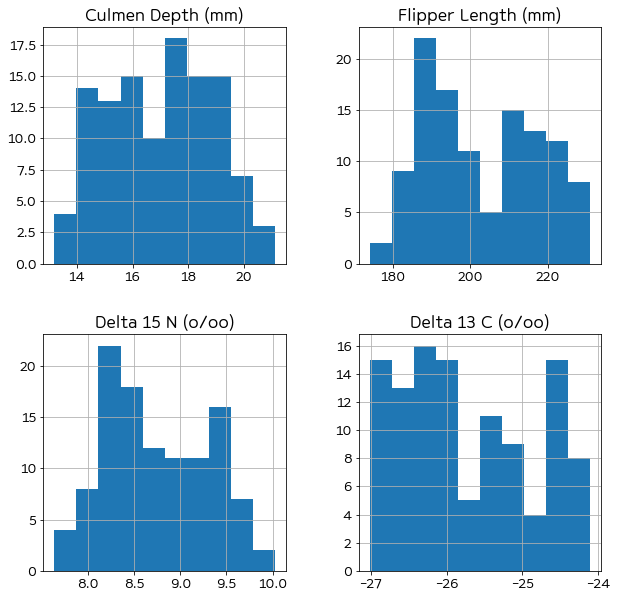

In [8]:
df[['Culmen Depth (mm)','Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].hist(figsize = (10,10))
plt.show()

In [9]:
df['Species'].value_counts()
#Island  , Sex 

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [10]:
df['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [11]:
df['Sex'].value_counts()

MALE      56
FEMALE    55
Name: Sex, dtype: int64

In [12]:
df[df['Delta 13 C (o/oo)'].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,,,,,,,,,,
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [13]:
df[df['Delta 15 N (o/oo)'].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,,,,,,,,,,
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [14]:
df.drop(index = [8,18,109], inplace = True)

In [15]:
df.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    2
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Body Mass (g)          0
dtype: int64

In [16]:
df[df['Sex'].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,,,,,,,,,,
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
data=df.drop([6,70],axis=0)
X_train=data.drop(['Species','Island','Clutch Completion','Sex'],axis=1)
y_train=data['Sex']
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
nan1=np.array(df.iloc[6].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan2=np.array(df.iloc[70].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)

In [19]:
prediction1=knn.predict(nan1)
prediction2=knn.predict(nan2)
print(prediction1)
print(prediction2)

['MALE']
['FEMALE']


In [20]:
df.iloc[6, 6] = 'MALE'

In [21]:
df.iloc[70,6]

'FEMALE'

In [22]:
df.loc[df['Sex'].isna(),'Sex'] = 'FEMALE'

In [23]:
df.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Body Mass (g)          0
dtype: int64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [25]:
ct=ColumnTransformer(
[("scaling",StandardScaler(),['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']),
('onehot',OneHotEncoder(sparse=False),['Species','Island','Clutch Completion','Sex'])])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_train_y = df['Body Mass (g)']
df_train_x = df.drop(columns = 'Body Mass (g)')

X_train,X_test,y_train,y_test=train_test_split(df_train_x,df_train_y,random_state=9190)


ct.fit(X_train)
X_train_trans=ct.transform(X_train)

In [27]:
model=LinearRegression()
model.fit(X_train_trans,y_train)
X_test_trans=ct.transform(X_test)
print("테스트 점수: {:.2f}".format(model.score(X_test_trans,y_test)))

y_pred=model.predict(X_test_trans)
MSE = mean_squared_error(y_test, y_pred) 
print('RMSE:',np.sqrt(MSE))

테스트 점수: 0.83
RMSE: 313.042862094764


## TEST Set EDA

In [28]:
df_test = pd.read_csv('test.csv', index_col = 'id')

In [29]:
df_test.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [30]:
df_test[df_test['Delta 13 C (o/oo)'].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
id,,,,,,,,,
27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN
205,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,NaN,NaN,NaN
215,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,41.1,19.0,182.0,MALE,NaN,NaN


In [31]:
df_test[df_test['Delta 15 N (o/oo)'].isna()].index

Int64Index([27, 75, 81, 106, 159, 175, 202, 205, 215], dtype='int64', name='id')

In [32]:
df_test.loc[[27, 75, 81, 106, 159, 175, 202, 205, 215], 'Delta 15 N (o/oo)'] = df_test['Delta 15 N (o/oo)'].mean()

In [33]:
df_test.loc[[27, 81, 106, 159, 175, 202, 205, 215], 'Delta 13 C (o/oo)'] = df_test['Delta 13 C (o/oo)'].mean()

In [34]:
df_test[df_test['Sex'].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
id,,,,,,,,,
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.632430,-25.213150
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,8.731226,-25.667745
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.258180,-26.238860
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.041110,-26.184440
205,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,NaN,8.731226,-25.667745
209,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.3,216.0,NaN,7.966210,-25.693270


In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
data=df_test.drop([46,81,98,152,205,209],axis=0)
X_train=data.drop(['Species','Island','Clutch Completion','Sex'],axis=1)
y_train=data['Sex']
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
nan1=np.array(df_test.iloc[46].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan2=np.array(df_test.iloc[81].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan3=np.array(df_test.iloc[98].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan4=np.array(df_test.iloc[152].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan5=np.array(df_test.iloc[205].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)
nan6=np.array(df_test.iloc[209].drop(['Species','Island','Clutch Completion','Sex'])).reshape(1,-1)

In [37]:
prediction1=knn.predict(nan1)
prediction2=knn.predict(nan2)
prediction3=knn.predict(nan3)
prediction4=knn.predict(nan4)
prediction5=knn.predict(nan5)
prediction6=knn.predict(nan6)

print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)
print(prediction5)
print(prediction6)

['FEMALE']
['MALE']
['FEMALE']
['FEMALE']
['MALE']
['MALE']


In [38]:
df_test.loc[[46,98,152],'Sex'] = 'FEMALE'
df_test.loc[[81,205,209],'Sex']='MALE'

In [39]:
df_test.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [40]:
X_test_trans=ct.fit_transform(df_test)

In [41]:
y_pred=model.predict(X_test_trans)
print(y_pred)

[4398.96731221 5684.04312816 3598.39951913 3436.2730058  3297.53290532
 4251.53971461 4701.88648117 5456.35741323 4688.38246624 3910.05454869
 4242.26794952 4530.87894787 4798.45827209 4806.89884194 5279.30242623
 5449.3155819  4289.19941617 4013.36921264 3437.78672457 3572.24324512
 4256.32402569 5627.54090039 5529.38086538 4214.23254785 3478.51266297
 4703.99125112 3284.4686988  4087.1563574  4200.09541108 4904.45198612
 3512.72887948 4832.82777675 3547.95621923 4971.54208932 3933.9841804
 3240.9378388  4707.6669025  3726.48504644 4166.53049129 4795.12010571
 4157.56040842 3653.1234334  4107.40402018 5469.88815137 3665.10904924
 4862.54473746 3468.25039114 4289.0557482  4839.62171016 5641.46826524
 3722.66346761 4187.7397707  3492.64260801 4290.39557981 3972.83005721
 4205.64196989 4862.67764094 4145.95286238 4812.57810296 3621.08024568
 4255.47811466 3602.21441978 4126.13472678 5569.52065488 3483.69163117
 3981.55555457 4215.51641317 4651.65031591 3969.38267659 3901.83477232
 4865.7

In [42]:
submission = pd.DataFrame({"id": df_test.index  ,"Body Mass (g)": y_pred})
submission.to_csv('sampel_submission.csv', index=False)